##*Multi Threading*

In [ ]:
import time
import concurrent.futures
import threading
import logging
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def task():
    # Create 2 rand 100x100 matrices
    mat1 = 10 * np.random.random_sample((500,500))
    mat2 = 10 * np.random.random_sample((500,500))
    # Multiply matricex
    mul = mat1*mat2

results = pd.DataFrame(columns = ["Exec","#_of_Mat","Time"])
NO_OF_MATRICES = 5000

In [ ]:
%%time
# Serial Execution
start = time.perf_counter()

for _ in range(NO_OF_MATRICES):
    task()

finish = time.perf_counter()
results.loc[len(results)] = ["Serial Execution",NO_OF_MATRICES,round(finish-start,3)]

CPU times: user 30.1 s, sys: 18.1 s, total: 48.2 s
Wall time: 48.4 s


In [ ]:
%%time
# Using ProcessPoolExecutor
start = time.perf_counter()

with concurrent.futures.ProcessPoolExecutor() as executor:
    [executor.submit(task) for _ in range(NO_OF_MATRICES)]

finish = time.perf_counter()
results.loc[len(results)] = ["Using MultiProcessing",NO_OF_MATRICES,round(finish-start,3)]

CPU times: user 2.27 s, sys: 331 ms, total: 2.6 s
Wall time: 47 s


In [ ]:
%%time
# Using ThreadPoolExecutor
start = time.perf_counter()

with concurrent.futures.ThreadPoolExecutor() as executor:
    [executor.submit(task) for _ in range(NO_OF_MATRICES)]

finish = time.perf_counter()
results.loc[len(results)] = ["Using MultiThreading",NO_OF_MATRICES,round(finish-start,3)]

CPU times: user 36.2 s, sys: 16.2 s, total: 52.4 s
Wall time: 41.3 s


In [ ]:
matrices = [1000,2500,7500,10000]
for mat in matrices:
    print("> No of mats",mat)
    # Serial Execution
    start = time.perf_counter()

    for _ in range(mat):
        task()

    finish = time.perf_counter()
    results.loc[len(results)] = ["Serial Execution",mat,round(finish-start,3)]

    # Using ProcessPoolExecutor
    start = time.perf_counter()

    with concurrent.futures.ProcessPoolExecutor() as executor:
        [executor.submit(task) for _ in range(mat)]

    finish = time.perf_counter()
    results.loc[len(results)] = ["Using MultiProcessing",mat,round(finish-start,3)]

    # Using ThreadPoolExecutor
    start = time.perf_counter()

    with concurrent.futures.ThreadPoolExecutor() as executor:
        [executor.submit(task) for _ in range(mat)]

    finish = time.perf_counter()
    results.loc[len(results)] = ["Using MultiThreading",mat,round(finish-start,3)]

> No of mats 1000
> No of mats 2500
> No of mats 7500
> No of mats 10000


In [ ]:
results = results.sort_values("#_of_Mat")

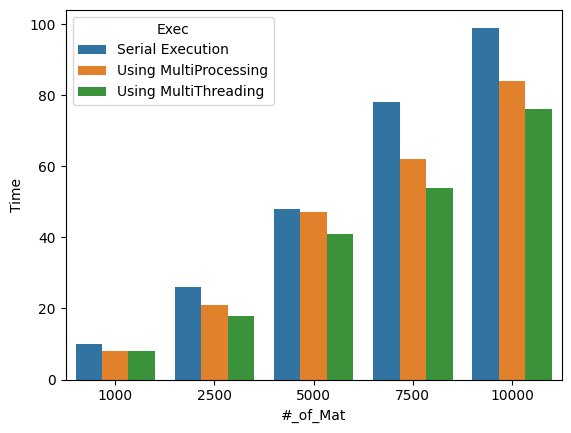

In [ ]:
import seaborn as sns
sns.barplot(data=results,x="#_of_Mat",y="Time",hue="Exec");